# Exercises

---

## Exercise 1: structured and unstructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [1]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt

(1797, 64)


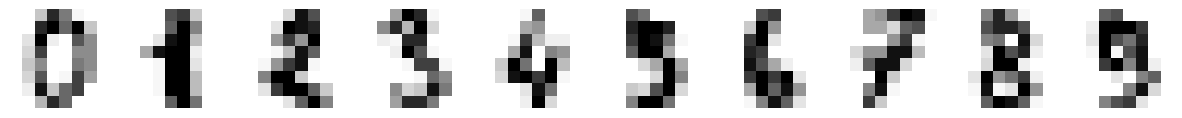

In [6]:
dataset = load_digits()
images = dataset.data
print(images.shape)

plt.figure(figsize=(15,7))
for i,img in enumerate(images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys) # 8 x 8 pixel images
    plt.axis('off')

In [ ]:
# scaler = StandardScaler()
# pca = PCA()

# # z-score with fit_transform method
# X = scaler.fit_transform(images)
# pca.fit(X)

# print(type(pca.explained_variance_ratio_))
# print(pca.explained_variance_ratio_.shape)
# print(pca.explained_variance_ratio_[2])

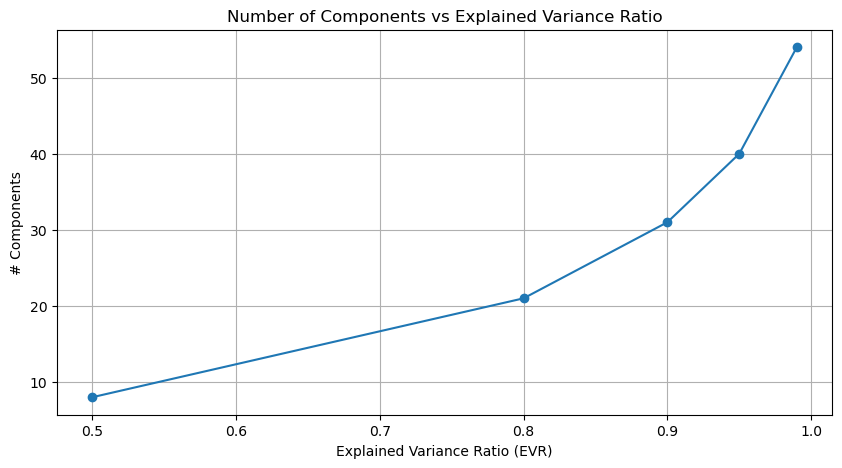

In [4]:
# EVR = 0.90
EVR_list = [0.50, 0.80, 0.90, 0.95, 0.99]

# Function to find the number of components needed to reach a given EVR
def find_n_components(data, EVR):
    # Define scaler and PCA objects
    scaler = StandardScaler()
    pca = PCA()

    X = scaler.fit_transform(data)
    pca.fit(X)

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= EVR) + 1
    return n_components

comp_list = [find_n_components(images, EVR) for EVR in EVR_list]

plt.figure(figsize=(10, 5))
plt.plot(EVR_list, comp_list, marker='o')
plt.title('Number of Components vs Explained Variance Ratio')
plt.xlabel('Explained Variance Ratio (EVR)')
plt.ylabel('# Components')
plt.grid()

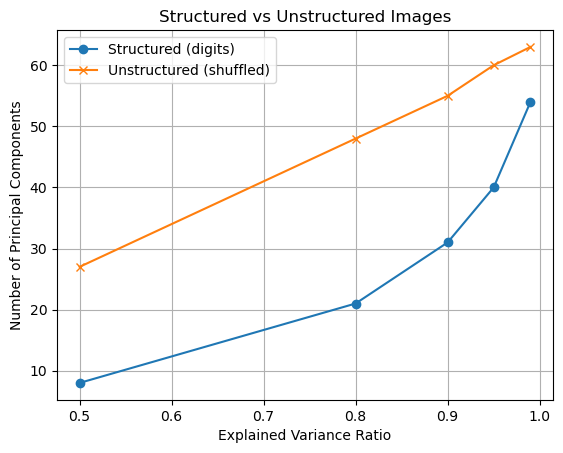

In [13]:
images_shuffled = images.copy()
# print(images_shuffled.shape)

for i in range(images.shape[0]):
    np.random.shuffle(images_shuffled[i])  # Shuffle pixels independently

un_comp_list = [find_n_components(images_shuffled, EVR) for EVR in EVR_list]

plt.plot(EVR_list, comp_list, label='Structured (digits)', marker='o')
plt.plot(EVR_list, un_comp_list, label='Unstructured (shuffled)', marker='x')
plt.xlabel("Explained Variance Ratio")
plt.ylabel("Number of Principal Components")
plt.title("Structured vs Unstructured Images")
plt.legend()
plt.grid(True)
plt.show()

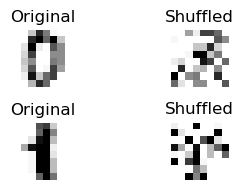

In [14]:
plt.figure(figsize=(4, 2))
for i, (orig, shuf) in enumerate(zip(images[:2], images_shuffled[:2])):
    plt.subplot(2, 2, 2*i+1)
    plt.imshow(orig.reshape(8,8), cmap=plt.cm.Greys)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2, 2, 2*i+2)
    plt.imshow(shuf.reshape(8,8), cmap=plt.cm.Greys)
    plt.title("Shuffled")
    plt.axis('off')
plt.tight_layout()
plt.show()

The number of principle components required to reach each corresponding EVR for the unstructured data compared to the hand-written digits is larger every time. The explanation is that the digits due to the fact that they retain a structure the neighboring pixels are correlated with each other and a small number of PCs can catch main direction of variation. If it is randomly shuffled then this spatial relationship is lost and more PCs are necessary in order to capture whole pattern and variance.  

Moreover, the relationship between the explained variance ration and the number of components looks linear as it increases while in the structured data it seems more exponential.